In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=[
    ("Alice",12,3,800,0),
    ("Bob",2,1,50,1),
    ("Carol",15,30,1200,0),
    ("Dave",1,0,20,1),
    ("Eve",8,5,60,0),
    ("Frank",20,2,10,1),

]

In [3]:
df = pd.DataFrame(data, columns=["User", "PostsPerweek", "AvgLikes", "AccountAge","IsFraud"])
print(df)

    User  PostsPerweek  AvgLikes  AccountAge  IsFraud
0  Alice            12         3         800        0
1    Bob             2         1          50        1
2  Carol            15        30        1200        0
3   Dave             1         0          20        1
4    Eve             8         5          60        0
5  Frank            20         2          10        1


In [4]:
Edges=[
    ("Alice","Bob"),
    ("Alice","Carol"),
    ("Bob","Dave"),
    ("Carol","Eve"),
    ("Eve","Frank"),
    ("Frank","Bob")
]

In [5]:
x=df [["PostsPerweek","AvgLikes","AccountAge"]]
y=df["IsFraud"]
x_train,x_test,y_train,y_test,user_train,user_test=train_test_split(x,y,df["User"],test_size=0.2,random_state=42)

In [6]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test,y_pred))

actual_map=dict(zip(df["User"],df["IsFraud"]))
print(actual_map)

Accuracy: 1.0
{'Alice': 0, 'Bob': 1, 'Carol': 0, 'Dave': 1, 'Eve': 0, 'Frank': 1}


In [7]:
prediction_map=actual_map.copy()
for user,pred in zip(user_test,y_pred):
    prediction_map[user]=pred
print(prediction_map)

{'Alice': np.int64(0), 'Bob': np.int64(1), 'Carol': 0, 'Dave': 1, 'Eve': 0, 'Frank': 1}


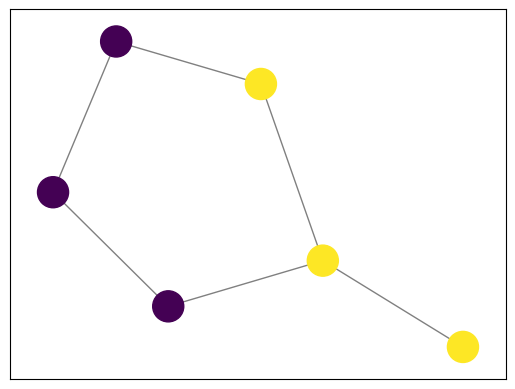

In [9]:
G=nx.Graph()
G.add_nodes_from(df["User"])
G.add_edges_from(Edges)
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_color=df["IsFraud"],node_size=500)
nx.draw_networkx_edges(G,pos,edge_color="gray")

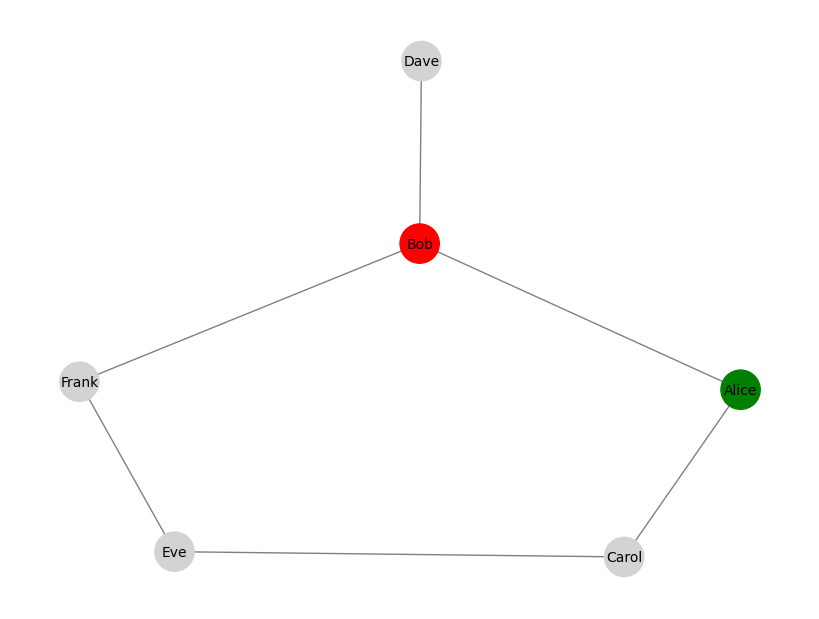

In [11]:
# Initialize the list and use color to visualized fraud
pos = nx.spring_layout(G, seed=42)
node_colors = []
for node in G.nodes():
  if node in user_test.values:
    node_colors.append("red" if prediction_map[node] == 1 else "green") # Use prediction_map
  else:
    node_colors.append("Lightgray")

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=800, font_size=10)
plt.show()